In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
# Spotify API credentials
client_id = "91924ddd17664918b13c9a03215e995b"
client_secret = "dcbdd3d0af7d47b68db10e4a438e0832"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [3]:
# Define the artist name(s) you want to search for
name = ["S. P. Balasubrahmanyam"]
# Search for the artist
artist = sp.search(name) 

In [4]:
# Get the URI of the first artist found
artists_uris = artist['tracks']['items'][0]['artists'][0]['uri']

# Get the albums of the artist
artist_albums = sp.artist_albums(artists_uris, album_type='album')

# Initialize empty lists to store album names and URIs
artist_album_names = []
artist_album_uris = []

# Extract album names and URIs
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])

In [5]:
# Function to retrieve songs from an album URI
def album_songs(uri):
    album = uri 
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] 
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album) 
    for n in range(len(tracks['items'])): 
        spotify_albums[album]['album'].append(artist_album_names[album_count]) 
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [6]:
# Dictionary to store album data
spotify_albums = {}
album_count = 0

# Loop through each album URI and retrieve songs
for i in artist_album_uris: #each album
    album_songs(i)
    print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1

Velmuruga album songs has been added to spotify_albums dictionary
Students (Original Motion Picture Soundtrack) album songs has been added to spotify_albums dictionary
Bharyamani (Original Motion Picture Soundtrack) album songs has been added to spotify_albums dictionary
Balakrishna Hit Songs album songs has been added to spotify_albums dictionary
Chandrabose Golden Memories album songs has been added to spotify_albums dictionary
The Essence of Bhagwad Gita album songs has been added to spotify_albums dictionary
Maa Baba album songs has been added to spotify_albums dictionary
Banni Kannada Naadige album songs has been added to spotify_albums dictionary
Super Ton for Tms album songs has been added to spotify_albums dictionary
Spb - The Hard Hitter album songs has been added to spotify_albums dictionary
S P Balasubramanyam Kannada Ayyappa album songs has been added to spotify_albums dictionary
S P Balasubramanyam Telugu Ayyappa album songs has been added to spotify_albums dictionary
Top 

In [7]:
# Function to retrieve audio features for tracks in an album
def audio_features(album):
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    
    track_count = 0
    for track in spotify_albums[album]['uri']:
        features = sp.audio_features(track)
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [8]:
# Import necessary libraries
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 12.084661960601807 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 26.709973096847534 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 46.63732194900513 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 62.110188007354736 seconds


In [9]:
# Dictionary to store data for creating a DataFrame
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []

# Populate the DataFrame dictionary
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

# Calculate the length of the DataFrame
len(dic_df['album'])

237

In [10]:
# Import pandas library and create a DataFrame
import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)
dataframe

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Velmuruga,1,3KAckTSVI3DcW9pK1U5Ecu,Vettri Vadivelava,spotify:track:3KAckTSVI3DcW9pK1U5Ecu,0.712,0.714,0.477,0.0,0.0704,-13.038,0.0728,80.372,0.936,2
1,Velmuruga,2,0JYMBStctKao4ZBo3h2lFY,Iraiva Muruga,spotify:track:0JYMBStctKao4ZBo3h2lFY,0.675,0.504,0.454,0.0,0.2200,-12.584,0.0482,88.561,0.777,2
2,Velmuruga,3,4AxvOFwohOZgq1Wyzjlaww,Kavadi Kavad,spotify:track:4AxvOFwohOZgq1Wyzjlaww,0.769,0.683,0.498,0.0,0.1240,-12.587,0.0592,137.582,0.794,1
3,Velmuruga,4,4MpBIMerG3SOyMVcvQ1awW,Vanna Vadivelava,spotify:track:4MpBIMerG3SOyMVcvQ1awW,0.819,0.619,0.355,0.0,0.3540,-13.119,0.0443,116.933,0.782,1
4,Velmuruga,5,6tnSlkghGAwMeNzrqW8TzU,Kandha Kumara,spotify:track:6tnSlkghGAwMeNzrqW8TzU,0.753,0.536,0.335,0.0,0.1670,-14.137,0.0626,90.032,0.657,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Denna Dennana,4,3JXYXzCC7DQSFqXhlgPCTM,Dharmanaadere Bathe,spotify:track:3JXYXzCC7DQSFqXhlgPCTM,0.567,0.665,0.586,0.0,0.2220,-10.082,0.0600,157.946,0.850,0
233,Denna Dennana,5,3yEvd3EE8StglD6msrISdt,Mallige Mudithinaal,spotify:track:3yEvd3EE8StglD6msrISdt,0.380,0.731,0.430,0.0,0.2210,-11.968,0.0481,127.014,0.836,0
234,Denna Dennana,6,3jM2wpAO9WeEGoBGxFX5ib,Mangaladevi Jayagowri,spotify:track:3jM2wpAO9WeEGoBGxFX5ib,0.608,0.802,0.533,0.0,0.2720,-10.400,0.0412,140.008,0.921,0
235,Denna Dennana,7,0bPigqq0nc2TeWpAWweQ3B,Manjunathana Smarane Malthana,spotify:track:0bPigqq0nc2TeWpAWweQ3B,0.368,0.730,0.527,0.0,0.1930,-8.902,0.0955,152.961,0.892,0


In [11]:
# Summary statistics
print(dataframe.describe())

# Data info
print(dataframe.info())


       track_number  acousticness  danceability      energy  instrumentalness  \
count    237.000000    237.000000    237.000000  237.000000        237.000000   
mean       8.949367      0.526933      0.633549    0.586000          0.051225   
std        7.831756      0.285600      0.128235    0.192157          0.167184   
min        1.000000      0.004990      0.160000    0.088000          0.000000   
25%        3.000000      0.292000      0.544000    0.430000          0.000000   
50%        6.000000      0.526000      0.646000    0.598000          0.000004   
75%       12.000000      0.784000      0.722000    0.729000          0.000141   
max       37.000000      0.991000      0.951000    0.983000          0.911000   

         liveness    loudness  speechiness       tempo     valence  popularity  
count  237.000000  237.000000   237.000000  237.000000  237.000000  237.000000  
mean     0.220791   -8.752890     0.085631  117.881017    0.666376    5.097046  
std      0.145841    3.0062

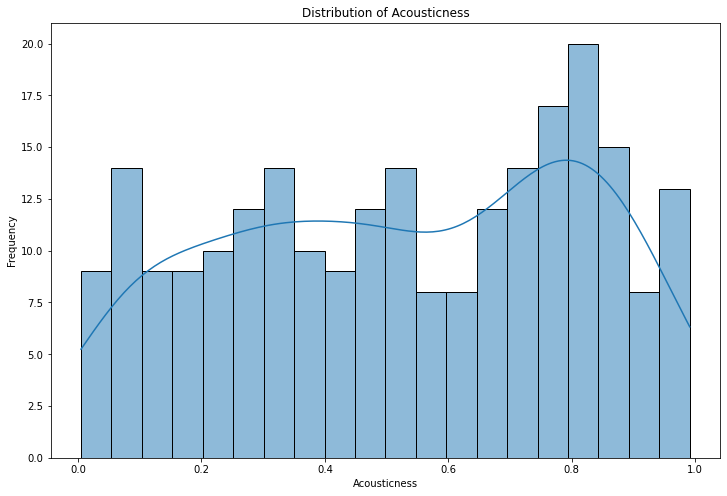

In [12]:
# Import matplotlib and seaborn for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
# Plot a histogram of the 'acousticness' feature
plt.figure(figsize=(12, 8))
sns.histplot(data=dataframe, x='acousticness', bins=20, kde=True)
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.show()

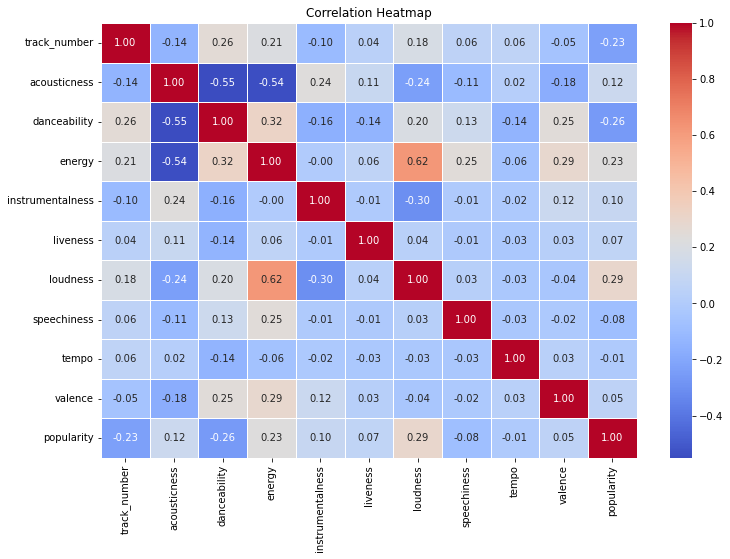

In [13]:
# Create a correlation matrix and plot a heatmap
correlation_matrix = dataframe.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

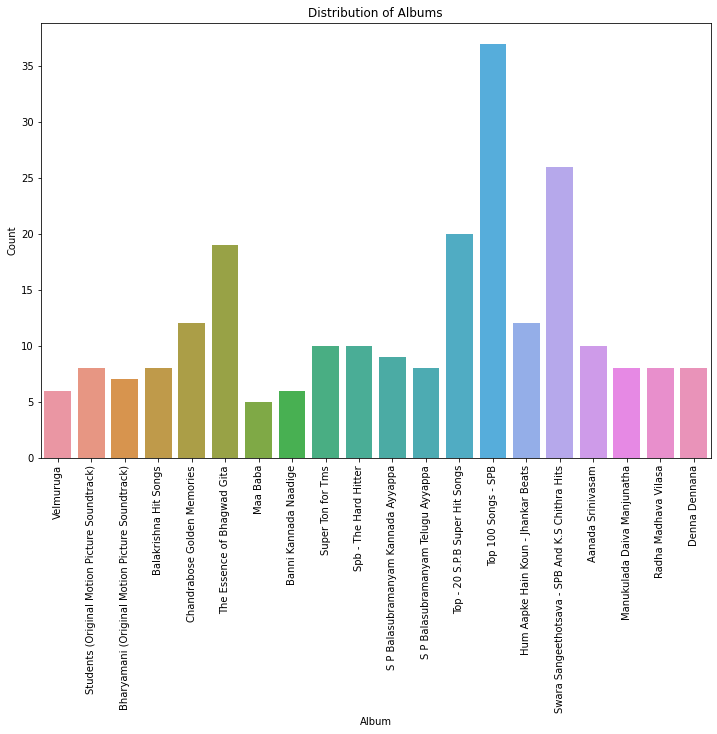

In [14]:
# Plot a countplot for the 'album' feature
plt.figure(figsize=(12, 8))
sns.countplot(data=dataframe, x='album')
plt.title('Distribution of Albums')
plt.xlabel('Album')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

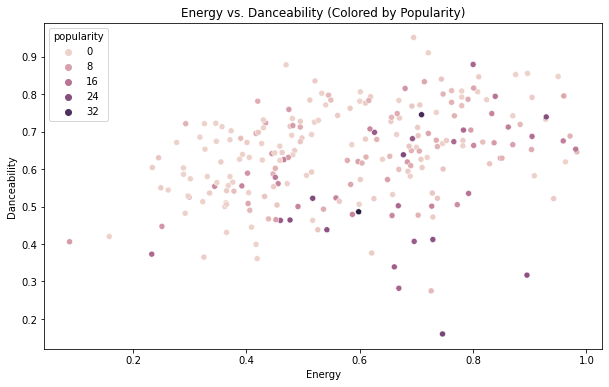

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='energy', y='danceability', hue='popularity')
plt.title('Energy vs. Danceability (Colored by Popularity)')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

In [16]:
correlation_matrix = dataframe.corr()
popularity_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print(popularity_correlations)

popularity          1.000000
loudness            0.291415
energy              0.227685
acousticness        0.122753
instrumentalness    0.100097
liveness            0.069614
valence             0.054745
tempo              -0.007912
speechiness        -0.082013
track_number       -0.231418
danceability       -0.255805
Name: popularity, dtype: float64


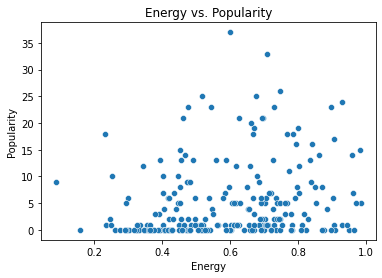

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=dataframe, x='energy', y='popularity')
plt.title('Energy vs. Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

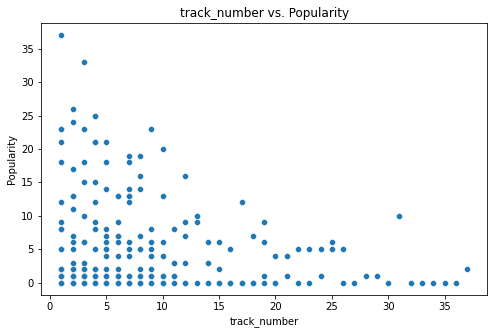

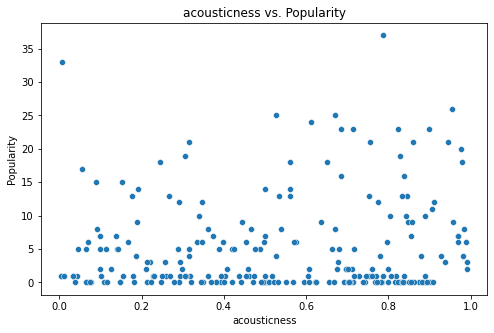

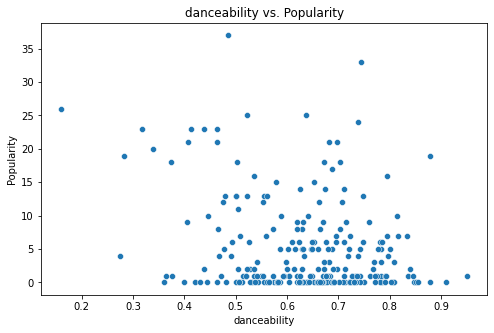

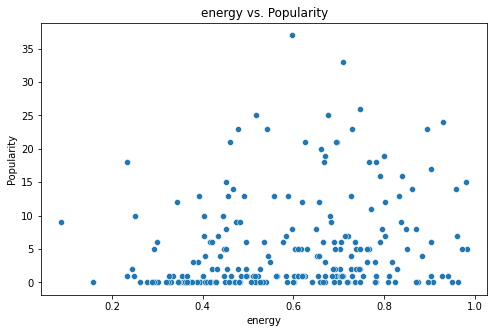

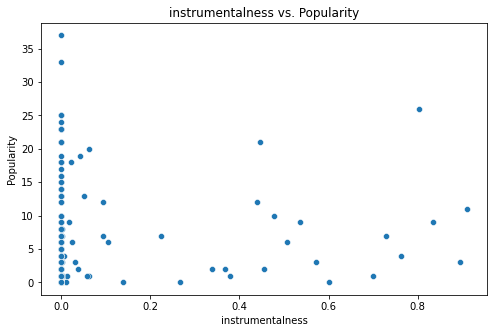

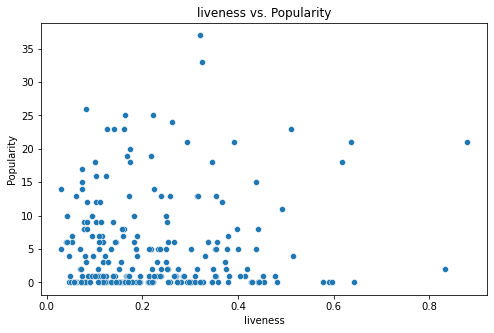

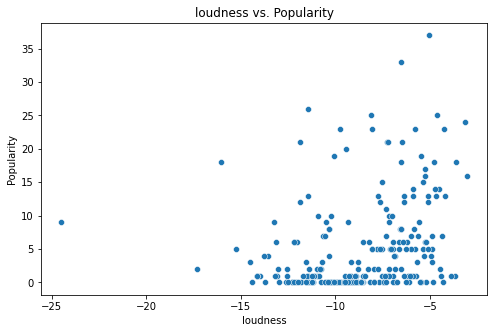

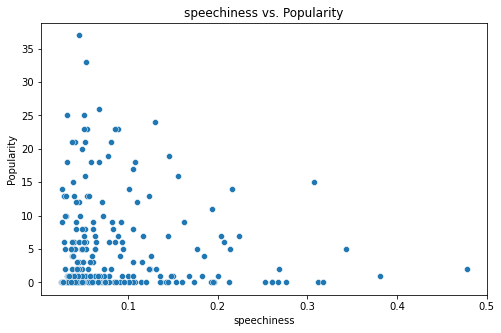

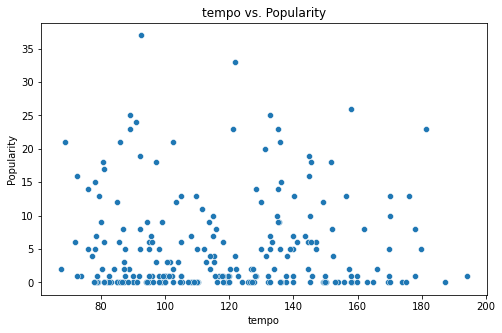

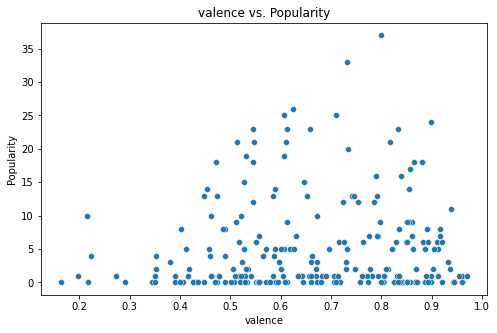

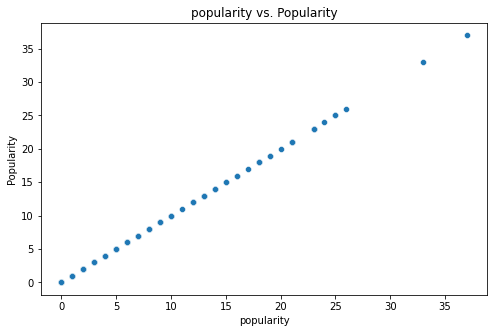

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the numeric columns (excluding 'popularity' which is the target)
numeric_features = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create scatter plots for all numeric features vs. 'popularity'
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=dataframe, x=feature, y='popularity')
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.show()



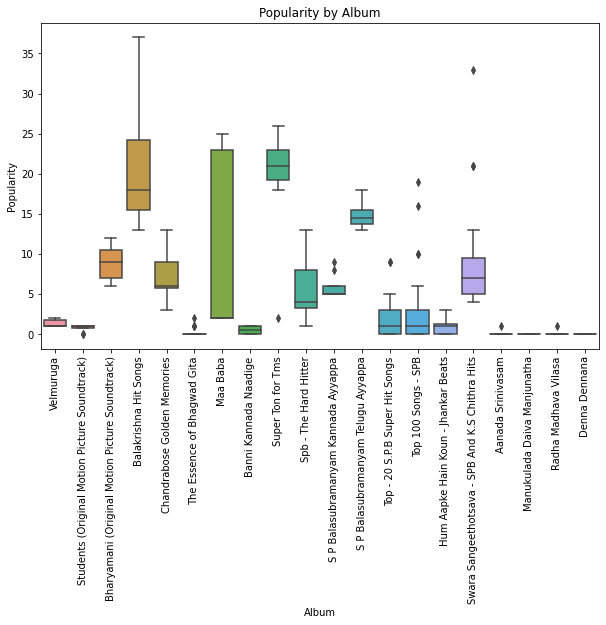

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe, x='album', y='popularity')
plt.title('Popularity by Album')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

/var/folders/x3/_hgnyv815n743kq31fkrbhl40000gn/T/ipykernel_25711/3371612692.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = dataframe.loc[~((dataframe < (Q1 - threshold * IQR)) | (dataframe > (Q3 + threshold * IQR))).any(axis=1)]


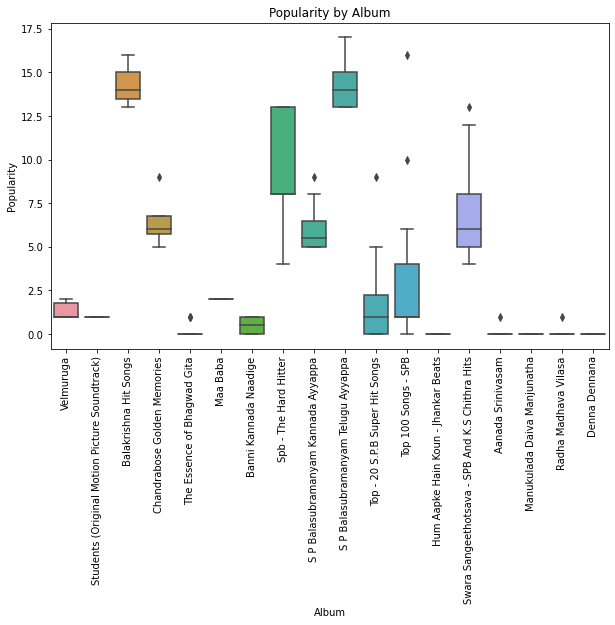

In [20]:
# Calculate the IQR (Interquartile Range)
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5
# Remove outliers
df_no_outliers = dataframe.loc[~((dataframe < (Q1 - threshold * IQR)) | (dataframe > (Q3 + threshold * IQR))).any(axis=1)]

# df_no_outliers now contains your dataset with outliers removed

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='album', y='popularity')
plt.title('Popularity by Album')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()


dataframe = df_no_outliers

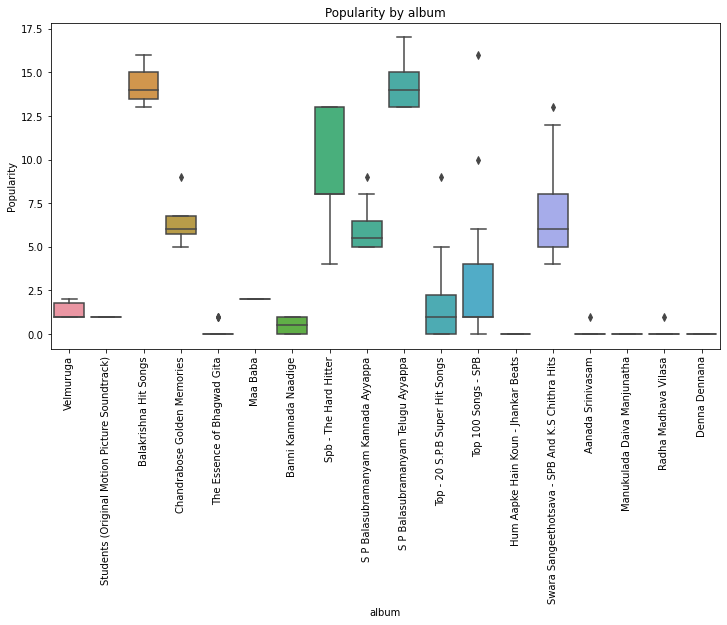

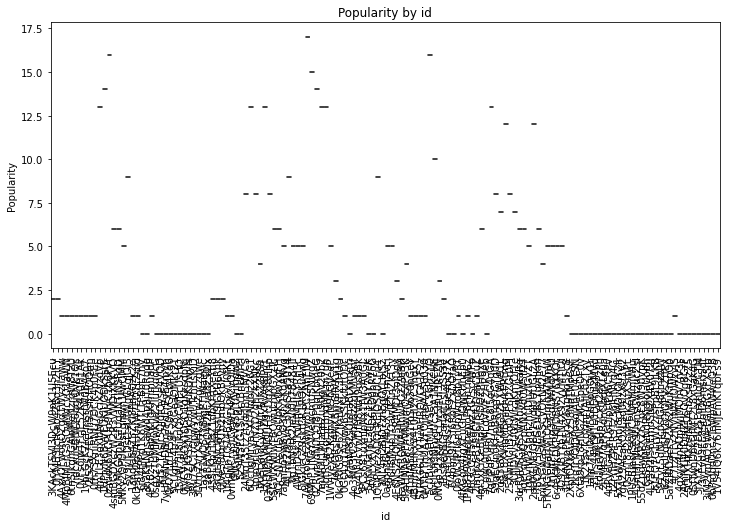

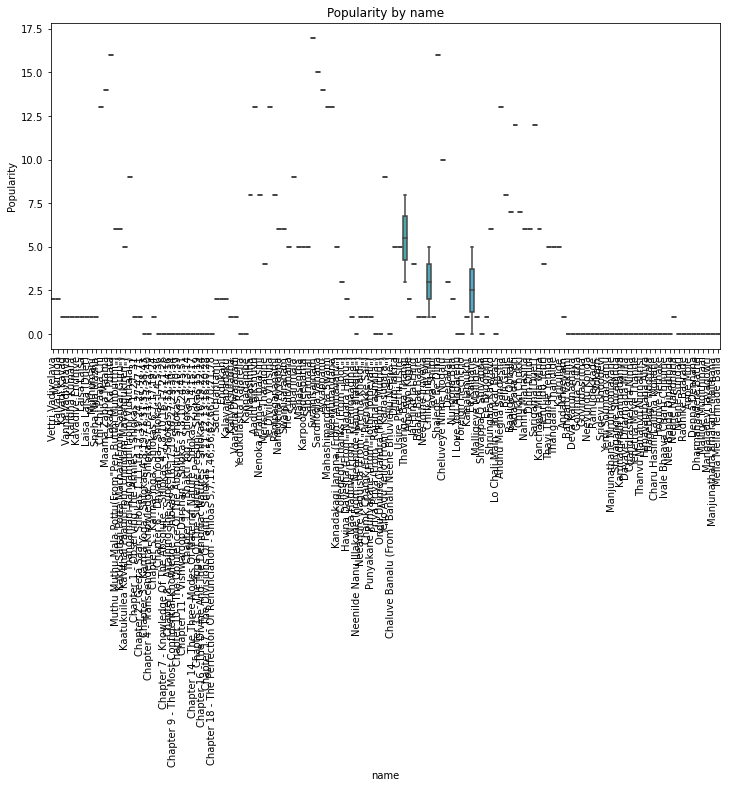

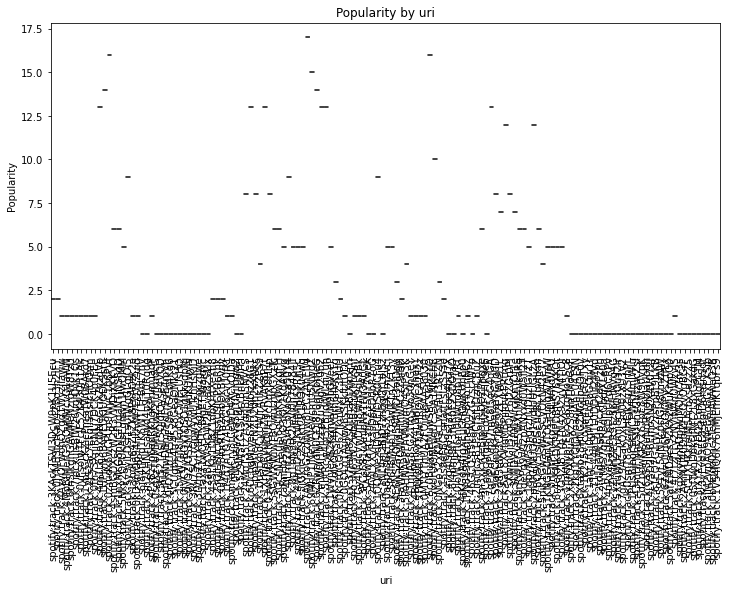

In [21]:
# Create box plots for all categorical features vs. 'popularity'
categorical_features = dataframe.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=dataframe, x=feature, y='popularity')
    plt.title(f'Popularity by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.xticks(rotation=90)
    plt.show()

In [22]:
dataframe

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Velmuruga,1,3KAckTSVI3DcW9pK1U5Ecu,Vettri Vadivelava,spotify:track:3KAckTSVI3DcW9pK1U5Ecu,0.712,0.714,0.477,0.0,0.0704,-13.038,0.0728,80.372,0.936,2
1,Velmuruga,2,0JYMBStctKao4ZBo3h2lFY,Iraiva Muruga,spotify:track:0JYMBStctKao4ZBo3h2lFY,0.675,0.504,0.454,0.0,0.2200,-12.584,0.0482,88.561,0.777,2
2,Velmuruga,3,4AxvOFwohOZgq1Wyzjlaww,Kavadi Kavad,spotify:track:4AxvOFwohOZgq1Wyzjlaww,0.769,0.683,0.498,0.0,0.1240,-12.587,0.0592,137.582,0.794,1
3,Velmuruga,4,4MpBIMerG3SOyMVcvQ1awW,Vanna Vadivelava,spotify:track:4MpBIMerG3SOyMVcvQ1awW,0.819,0.619,0.355,0.0,0.3540,-13.119,0.0443,116.933,0.782,1
4,Velmuruga,5,6tnSlkghGAwMeNzrqW8TzU,Kandha Kumara,spotify:track:6tnSlkghGAwMeNzrqW8TzU,0.753,0.536,0.335,0.0,0.1670,-14.137,0.0626,90.032,0.657,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Denna Dennana,4,3JXYXzCC7DQSFqXhlgPCTM,Dharmanaadere Bathe,spotify:track:3JXYXzCC7DQSFqXhlgPCTM,0.567,0.665,0.586,0.0,0.2220,-10.082,0.0600,157.946,0.850,0
233,Denna Dennana,5,3yEvd3EE8StglD6msrISdt,Mallige Mudithinaal,spotify:track:3yEvd3EE8StglD6msrISdt,0.380,0.731,0.430,0.0,0.2210,-11.968,0.0481,127.014,0.836,0
234,Denna Dennana,6,3jM2wpAO9WeEGoBGxFX5ib,Mangaladevi Jayagowri,spotify:track:3jM2wpAO9WeEGoBGxFX5ib,0.608,0.802,0.533,0.0,0.2720,-10.400,0.0412,140.008,0.921,0
235,Denna Dennana,7,0bPigqq0nc2TeWpAWweQ3B,Manjunathana Smarane Malthana,spotify:track:0bPigqq0nc2TeWpAWweQ3B,0.368,0.730,0.527,0.0,0.1930,-8.902,0.0955,152.961,0.892,0


In [24]:
svm_dataframe = dataframe
columns_to_remove = ['album', 'track_number', 'id','name','uri']
svm_dataframe.drop(columns=columns_to_remove, inplace=True)

KeyError: "['album' 'track_number' 'id' 'name' 'uri'] not found in axis"

In [25]:
svm_dataframe

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.712,0.714,0.477,0.0,0.0704,-13.038,0.0728,80.372,0.936,2
1,0.675,0.504,0.454,0.0,0.2200,-12.584,0.0482,88.561,0.777,2
2,0.769,0.683,0.498,0.0,0.1240,-12.587,0.0592,137.582,0.794,1
3,0.819,0.619,0.355,0.0,0.3540,-13.119,0.0443,116.933,0.782,1
4,0.753,0.536,0.335,0.0,0.1670,-14.137,0.0626,90.032,0.657,1
...,...,...,...,...,...,...,...,...,...,...
232,0.567,0.665,0.586,0.0,0.2220,-10.082,0.0600,157.946,0.850,0
233,0.380,0.731,0.430,0.0,0.2210,-11.968,0.0481,127.014,0.836,0
234,0.608,0.802,0.533,0.0,0.2720,-10.400,0.0412,140.008,0.921,0
235,0.368,0.730,0.527,0.0,0.1930,-8.902,0.0955,152.961,0.892,0


Support Vector Machine 

In [26]:
print(svm_dataframe.columns)

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'popularity'],
      dtype='object')


In [27]:
svm_dataframe

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.712,0.714,0.477,0.0,0.0704,-13.038,0.0728,80.372,0.936,2
1,0.675,0.504,0.454,0.0,0.2200,-12.584,0.0482,88.561,0.777,2
2,0.769,0.683,0.498,0.0,0.1240,-12.587,0.0592,137.582,0.794,1
3,0.819,0.619,0.355,0.0,0.3540,-13.119,0.0443,116.933,0.782,1
4,0.753,0.536,0.335,0.0,0.1670,-14.137,0.0626,90.032,0.657,1
...,...,...,...,...,...,...,...,...,...,...
232,0.567,0.665,0.586,0.0,0.2220,-10.082,0.0600,157.946,0.850,0
233,0.380,0.731,0.430,0.0,0.2210,-11.968,0.0481,127.014,0.836,0
234,0.608,0.802,0.533,0.0,0.2720,-10.400,0.0412,140.008,0.921,0
235,0.368,0.730,0.527,0.0,0.1930,-8.902,0.0955,152.961,0.892,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'popularity' is the target variable and other columns are features
X = svm_dataframe.drop('popularity', axis=1)
y = svm_dataframe['popularity']

# Splitting the data into train and test sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and training the SVR model
svr = SVR(kernel='rbf', C=1.0, gamma='scale')  # You can tune these hyperparameters
svr.fit(X_train, y_train)

# Predicting on the test set
y_pred = svr.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error (MSE): 34.025129214689315
R-squared Score: -0.027030854552929195


It seems like the model performance is not optimal based on the results you've obtained. The MSE value of 34.03 and a negative R-squared score indicate that the model might not be capturing the variability of the data well or might even be performing worse than a simple mean predictor.

In [40]:
print(y_train)

217     0
57      0
187     8
64      2
40      9
       ..
128     5
199     5
34      6
176     0
193    12
Name: popularity, Length: 113, dtype: int64


In [42]:
X_train

array([[-0.34981847, -0.05456929, -0.49374818, ..., -0.7059147 ,
        -1.27315001,  1.34286892],
       [ 1.27974118, -0.57374328, -1.41486801, ...,  1.41954302,
         0.10737184, -0.83259543],
       [ 0.59918262, -0.7012597 ,  0.64477882, ..., -0.25221552,
        -1.09241266, -1.42085875],
       ...,
       [-0.66741246,  1.20237828, -0.66538541, ...,  0.28194262,
         0.87219144,  0.95439314],
       [-1.64817296,  0.10938039, -0.44225701, ...,  1.06194761,
         1.4946668 ,  1.598153  ],
       [-0.82999034,  0.52836291,  0.46742034, ..., -0.68803493,
         0.46761506, -0.62725823]])

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svr = grid_search.best_estimator_

# Use the best model for prediction and evaluation
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Mean Squared Error (MSE): 34.929940435195775
R-squared Score: -0.05434211133442113


It looks like even after hyperparameter tuning using GridSearchCV, the model's performance hasn't significantly improved. The MSE and R-squared scores remain quite similar to the initial model's performance.

Given that the R-squared score is negative and the MSE is relatively high, it suggests that the linear SVR model might not be capturing the relationship between the features and the target variable ('popularity') well.

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared Score: {r2_rf}")


Random Forest Mean Squared Error (MSE): 19.06202068965517
Random Forest R-squared Score: 0.4246228052544686


Great to hear that the Random Forest model is showing improved performance compared to the SVR model! The MSE has decreased substantially, and the R-squared score being positive and higher indicates that the Random Forest model captures the relationship between the features and the target variable ('popularity') better than the linear SVR model.

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Use the best model for prediction and evaluation
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest Parameters: {best_params_rf}")
print(f"Best Random Forest Mean Squared Error (MSE): {mse_best_rf}")
print(f"Best Random Forest R-squared Score: {r2_best_rf}")


Best Random Forest Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Mean Squared Error (MSE): 20.410731674864078
Best Random Forest R-squared Score: 0.38391266461270956


he tuned Random Forest model has slightly different parameters and performances compared to the initial Random Forest model. While the MSE has increased slightly to 20.41, the R-squared score has decreased to around 0.38. It seems the previous configuration of the model was capturing the data patterns slightly better.

Given these results, it's essential to consider that tuning hyperparameters might not always lead to improved performance. Sometimes, the initial default parameters might work well for the dataset.

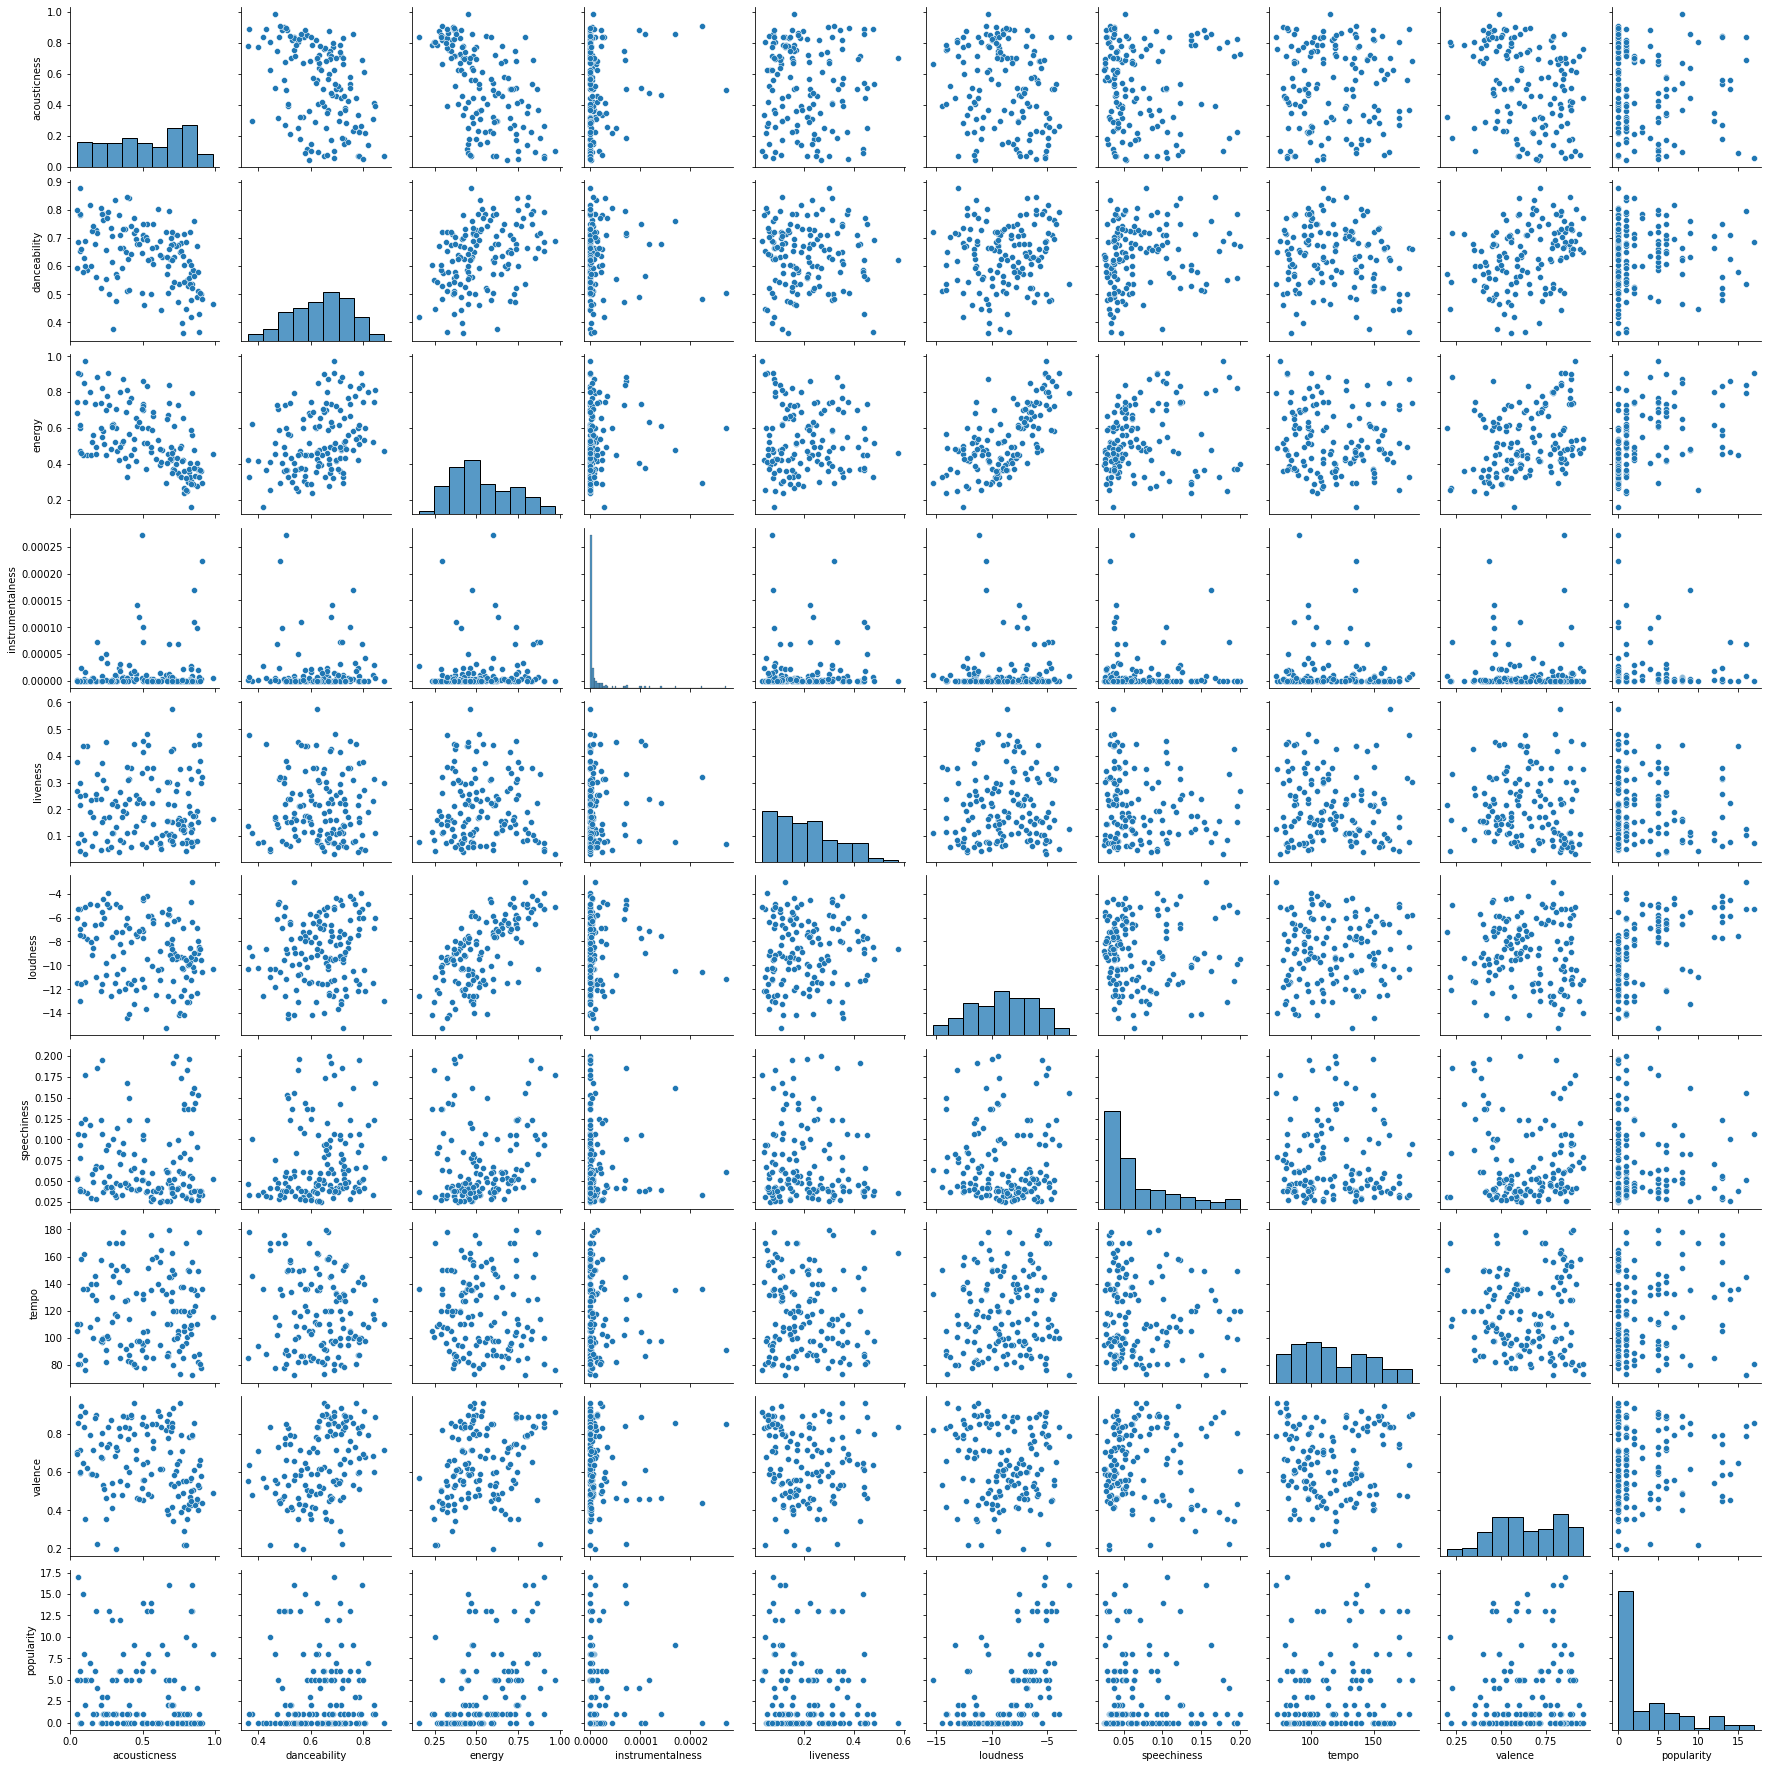

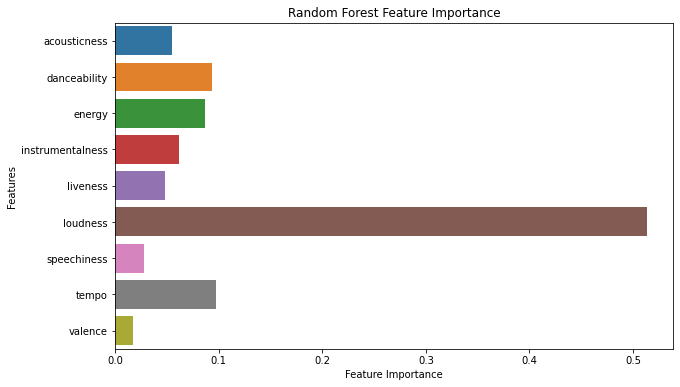

/Users/sravani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


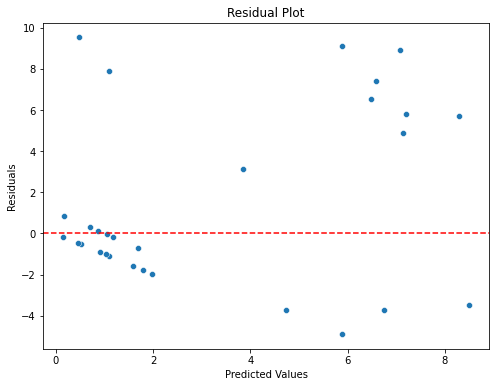

/Users/sravani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


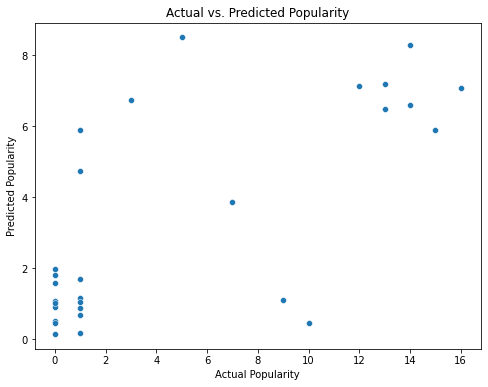

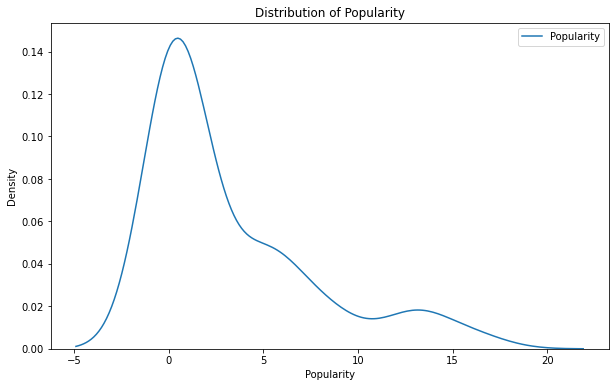

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
pairplot_data = svm_dataframe[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]
sns.pairplot(pairplot_data)
plt.show()

# Feature Importance Plot (for Random Forest model)
feature_importance = best_rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# Residual Plot (for Random Forest model)
residuals = y_test - y_pred_best_rf
plt.figure(figsize=(8, 6))
sns.scatterplot(y_pred_best_rf, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(y_test, y_pred_best_rf)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Popularity')
plt.show()

# Distribution Plots
plt.figure(figsize=(10, 6))
sns.kdeplot(svm_dataframe['popularity'], label='Popularity')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Distribution of Popularity')
plt.legend()
plt.show()


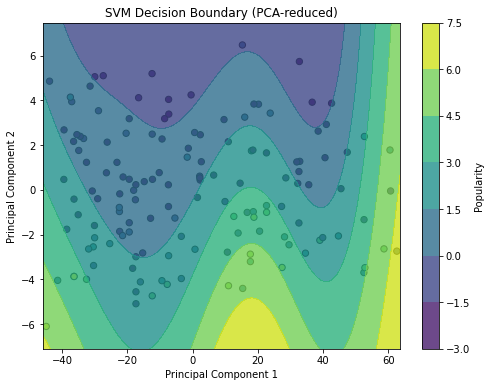

In [33]:
from sklearn.decomposition import PCA
import numpy as np

# Fit PCA to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit the SVM model (assuming best parameters from previous tuning)
svm = SVR(kernel='rbf', C=10, gamma='scale')
svm.fit(X_pca, y)

# Plot decision boundary
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create meshgrid to plot decision boundary
h = .02  # Step size of the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the meshgrid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

plt.title('SVM Decision Boundary (PCA-reduced)')
plt.colorbar(label='Popularity')
plt.show()


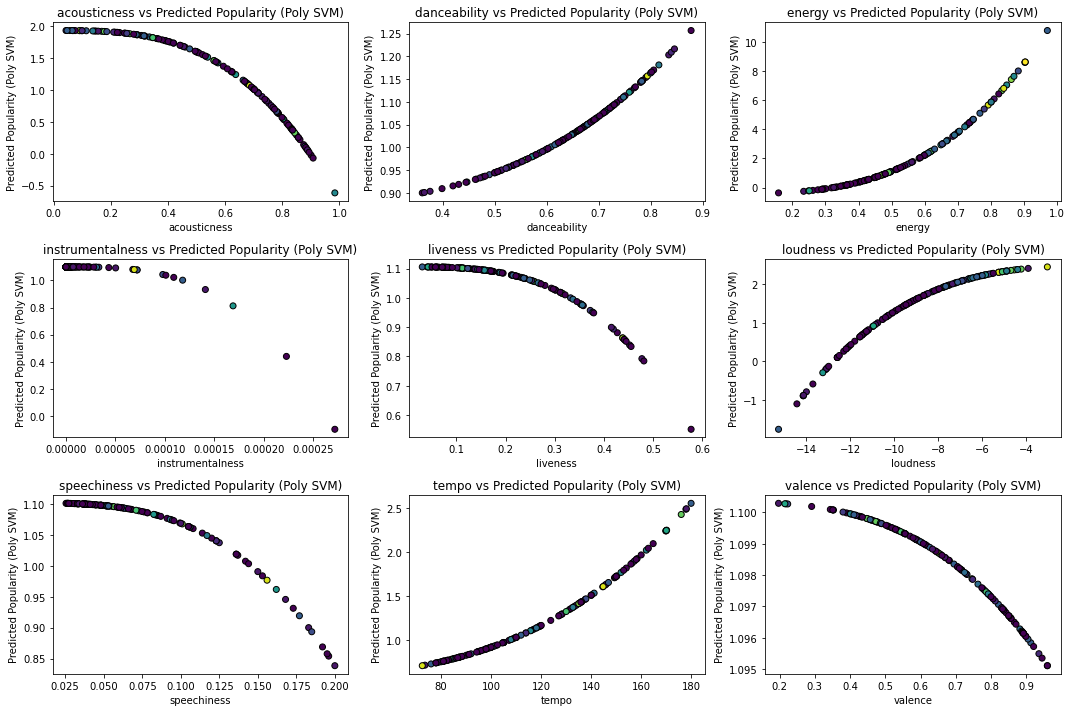

In [52]:
# Assuming X contains your features and y is your target variable 'popularity'

# Fit the SVM model with polynomial kernel
svm_poly = SVR(kernel='poly', degree=3, C=1.0)  # You can adjust degree and C

# Define the number of rows and columns for the subplot grid
n_cols = 3  # Change this based on the number of features or adjust the layout
n_rows = (len(X.columns) - 1) // n_cols + 1

# Create subplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    if feature != 'popularity':
        X_selected = X[[feature]]

        # Fit SVM and predict for the selected feature
        svm_poly.fit(X_selected, y)
        y_pred_selected_poly = svm_poly.predict(X_selected)

        # Plotting in each subplot
        plt.subplot(n_rows, n_cols, i + 1)
        plt.scatter(X_selected[feature], y_pred_selected_poly, c=y, cmap='viridis', edgecolor='k')
        plt.xlabel(feature)
        plt.ylabel('Predicted Popularity (Poly SVM)')
        plt.title(f'{feature} vs Predicted Popularity (Poly SVM)')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
